In [1]:
import tensorflow as tf

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [4]:
path_train = 'C:/Users/Jamal/Downloads/Compressed/data/train'
path_test = 'C:/Users/Jamal/Downloads/Compressed/data/test'

In [5]:
image_size = [224,224]

In [6]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 187s 2us/step


In [7]:
inception

<Functional name=inception_v3, built=True>

In [8]:
folders = glob(r'C:/Users/Jamal/Downloads/Compressed/data/train\*')

In [9]:
folders

['C:/Users/Jamal/Downloads/Compressed/data/train\\diseased cotton leaf',
 'C:/Users/Jamal/Downloads/Compressed/data/train\\diseased cotton plant',
 'C:/Users/Jamal/Downloads/Compressed/data/train\\fresh cotton leaf',
 'C:/Users/Jamal/Downloads/Compressed/data/train\\fresh cotton plant']

In [10]:
for layer in inception.layers:
    layer.trainable = False

In [11]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs = inception.input, outputs = prediction)
model.summary()

# 23 million params

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,007,588 (83.95 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(r'C:/Users/Jamal/Downloads/Compressed/data/train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory(r'C:/Users/Jamal/Downloads/Compressed/data/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [17]:
r = model.fit(train_set, 
                        validation_data= test_set, 
                        epochs=20, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

Epoch 1/20


C:\Users\Jamal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 578s 8s/step - accuracy: 0.6302 - loss: 2.7791 - val_accuracy: 0.8333 - val_loss: 0.4343
Epoch 2/20


C:\Users\Jamal\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 409s 6s/step - accuracy: 0.8851 - loss: 0.6829 - val_accuracy: 0.8333 - val_loss: 1.0237
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.8652 - loss: 0.8613 - val_accuracy: 0.9444 - val_loss: 0.1947
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 352s 5s/step - accuracy: 0.8920 - loss: 0.5822 - val_accuracy: 0.8889 - val_loss: 0.5141
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accur

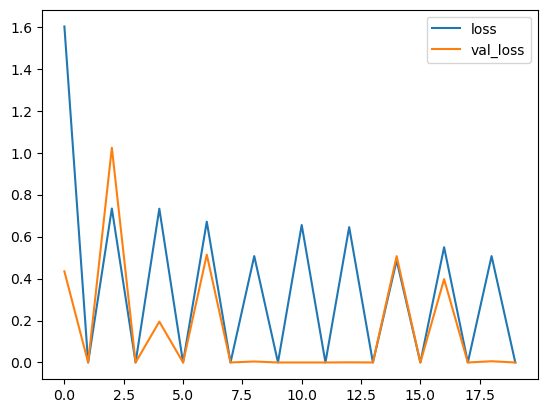

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

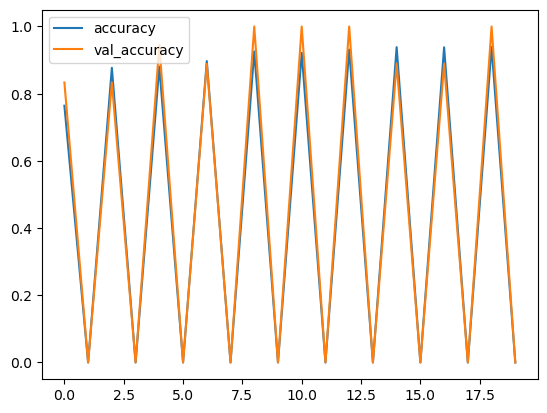

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')


In [20]:
y_pred = model.predict(test_set)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[1.47203466e-24, 5.46062806e-10, 3.52236729e-21, 1.00000000e+00],
       [5.23117850e-15, 5.41523555e-08, 1.03394500e-13, 1.00000000e+00],
       [1.00000000e+00, 4.16217517e-36, 3.17021652e-25, 4.19789476e-20],
       [0.00000000e+00, 5.29280537e-36, 6.13666545e-38, 1.00000000e+00],
       [9.22110200e-01, 7.78898075e-02, 7.20638217e-14, 2.73057141e-12],
       [3.47879496e-36, 8.13105638e-17, 2.13743573e-35, 1.00000000e+00],
       [3.40830778e-14, 1.35392294e-13, 1.00000000e+00, 1.01556800e-18],
       [7.52083453e-23, 6.99352935e-21, 1.27425109e-16, 1.00000000e+00],
       [2.32835952e-02, 2.56390859e-15, 9.76716399e-01, 3.55476090e-16],
       [7.82872120e-25, 1.00000000e+00, 0.00000000e+00, 1.16826767e-29],
       [1.00000000e+00, 5.05466506e-23, 7.33636014e-17, 6.90627885e-29],
       [3.60463673e-11, 1.97027949e-18, 1.00000000e+00, 1.82593038e-10],
       [5.20509555e-17, 9.99999881e-01, 5.91633426e-12, 1.34410428e-07],
       [1.32013518e-28, 1.00000000e+00, 7.65096931e

In [21]:
y_pred.shape

(18, 4)

In [22]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([3, 3, 0, 3, 0, 3, 2, 3, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1], dtype=int64)

In [23]:
y_pred.shape

(18, 4)

In [27]:
model.save('model_inceptionv3.h5')

In [3]:
### Tommorrow

In [25]:
from tensorflow.keras.models import load_model

model=load_model('model_inceptionv3.h5')

In [26]:
y_pred = model.predict(test_set)
len(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


18

In [20]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

array([2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1], dtype=int64)